
`pairplot` and `FacetGrid` are both powerful tools in Seaborn for visualizing relationships in data, but they serve different purposes and have distinct features. Here’s a comparison of the two:

### **1. `pairplot`**

-   **Purpose:** `pairplot` is specifically designed to create a matrix of scatter plots and histograms for visualizing relationships between pairs of variables in a DataFrame.
-   **Usage:** Ideal for exploring relationships between multiple numerical variables and identifying patterns or correlations.

#### **Key Features:**

-   **Scatter Plot Matrix:** Automatically generates scatter plots for each pair of variables.
-   **Histograms:** Displays histograms on the diagonal to show the distribution of each variable.
-   **Coloring by Category:** Supports coloring points based on a categorical variable using the `hue` parameter.

## Ref[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

# Pair Plot

In [3]:
import seaborn as sns

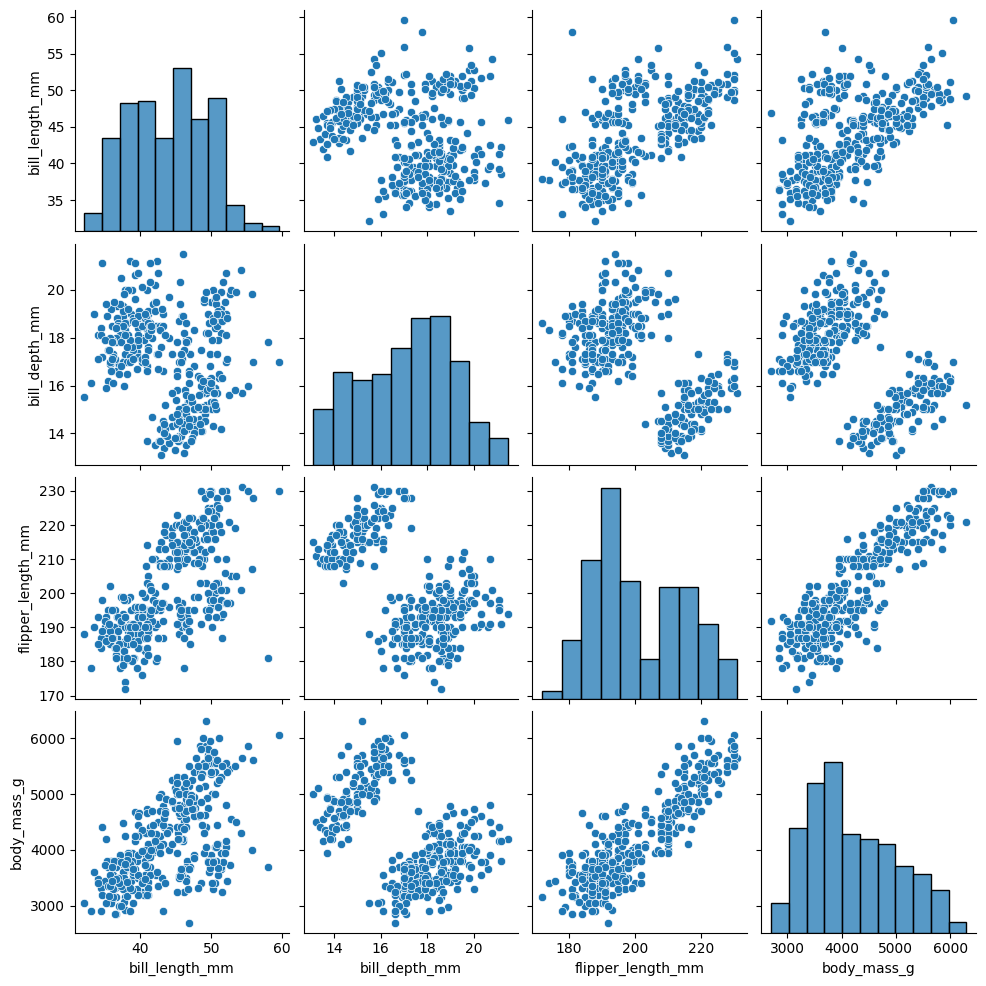

In [4]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

Assigning a `hue` variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

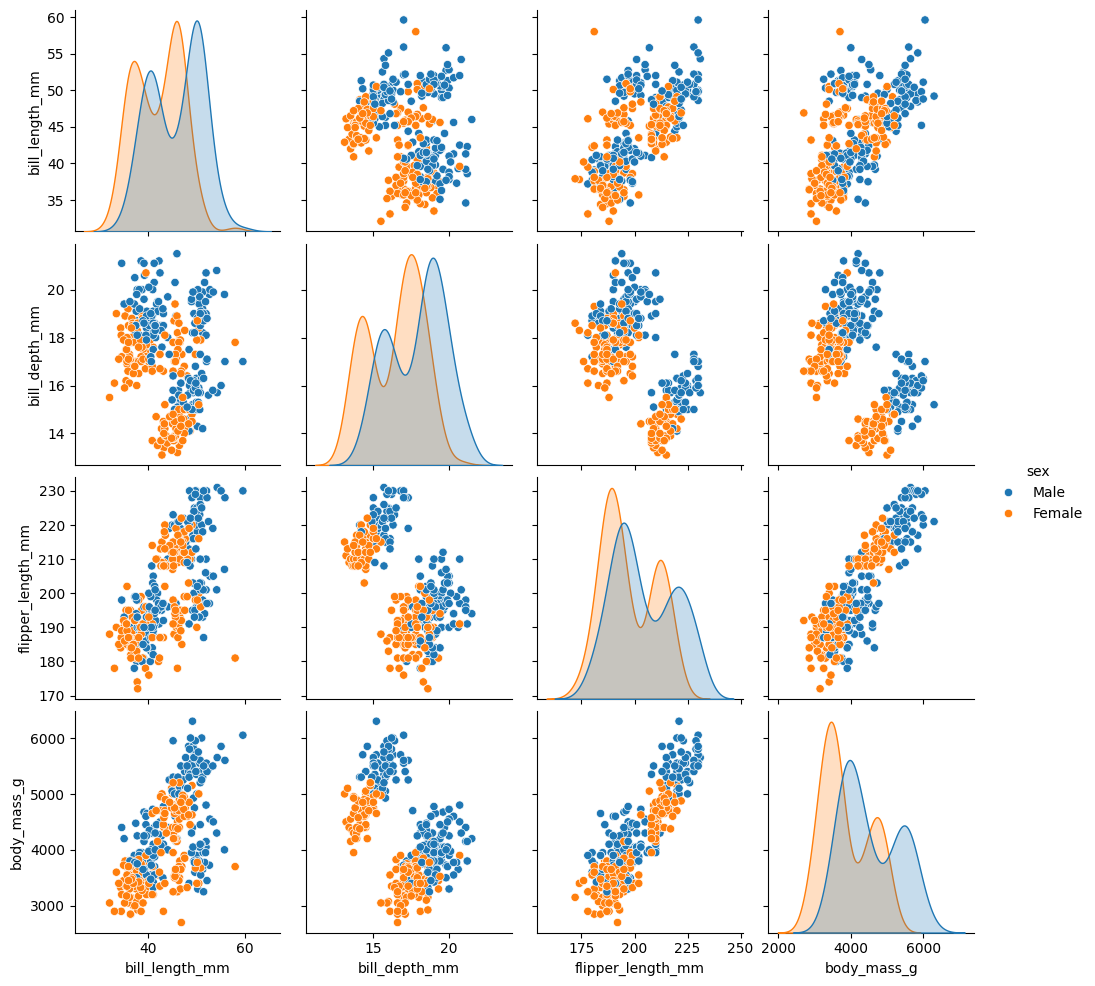

In [5]:
sns.pairplot(penguins, hue="sex")


It’s possible to force marginal histograms:

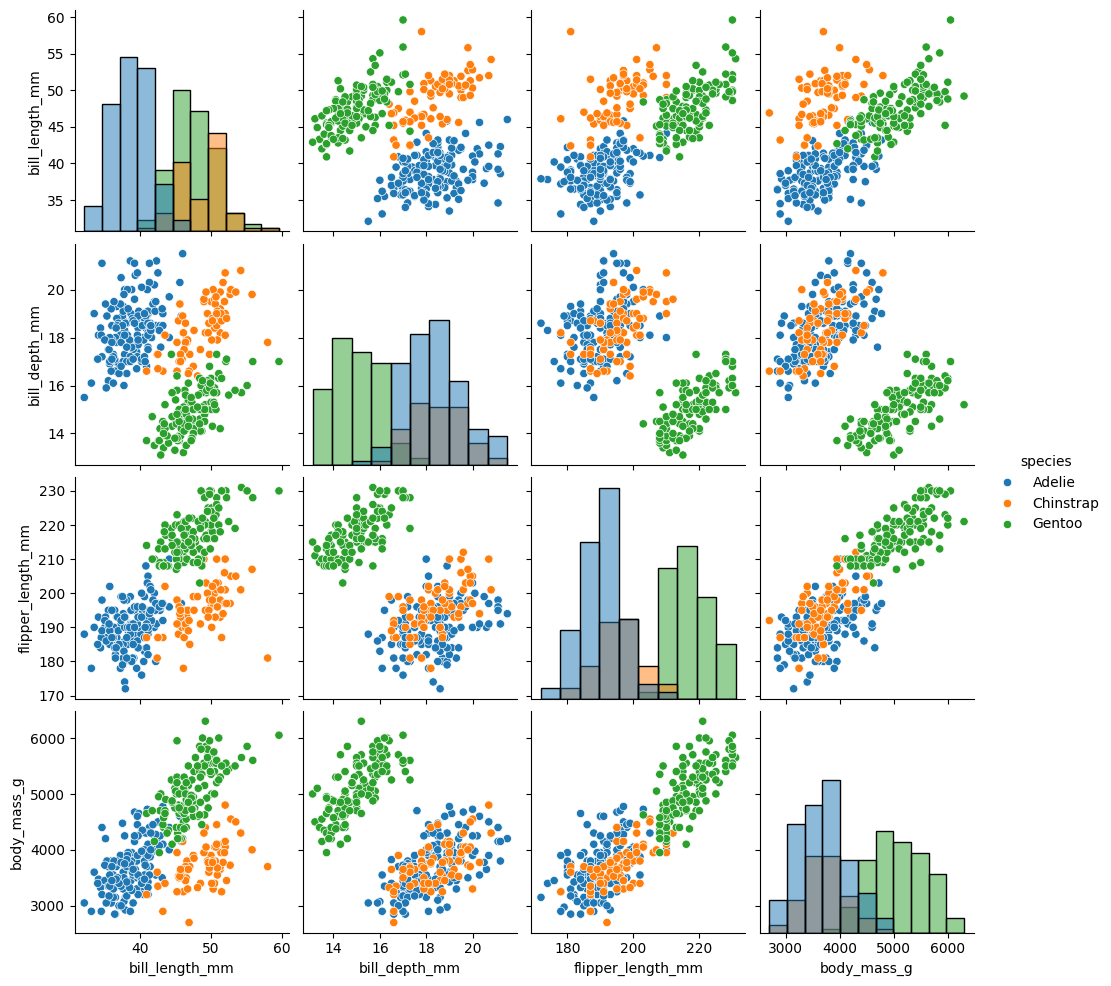

In [6]:
sns.pairplot(penguins, hue="species", diag_kind="hist")

he `kind` parameter determines both the diagonal and off-diagonal plotting style. Several options are available, including using [`kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot") to draw KDEs:

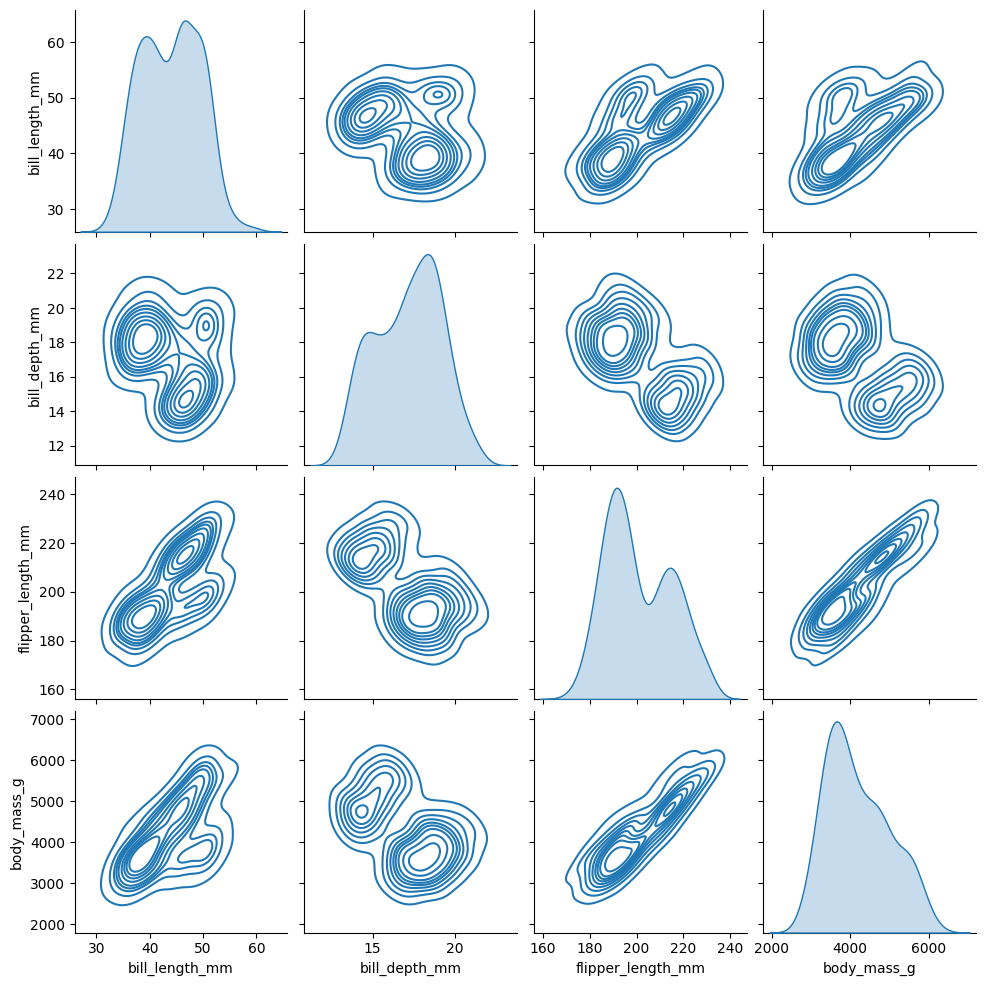

In [7]:
sns.pairplot(penguins, kind="kde")


Or [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot") to draw both bivariate and univariate histograms:

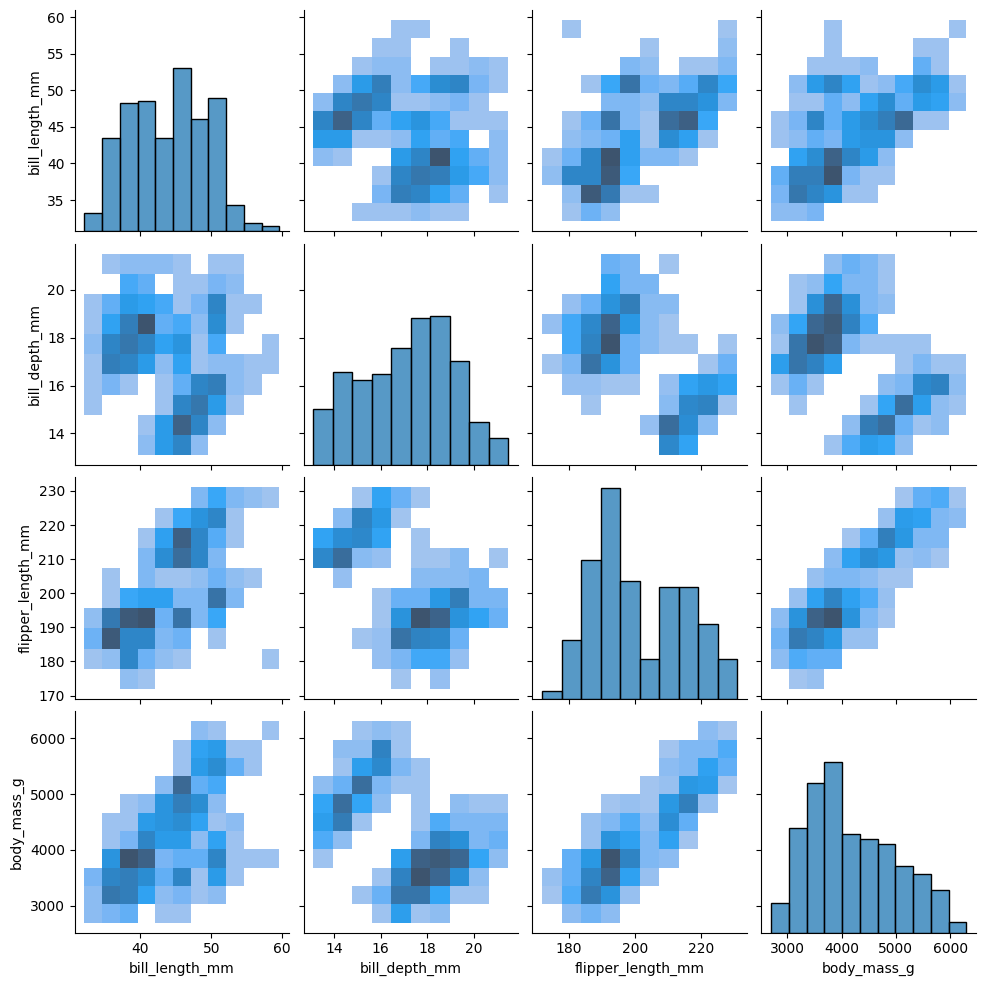

In [8]:
sns.pairplot(penguins, kind="hist")

The `markers` parameter applies a style mapping on the off-diagonal axes. Currently, it will be redundant with the `hue` variable:

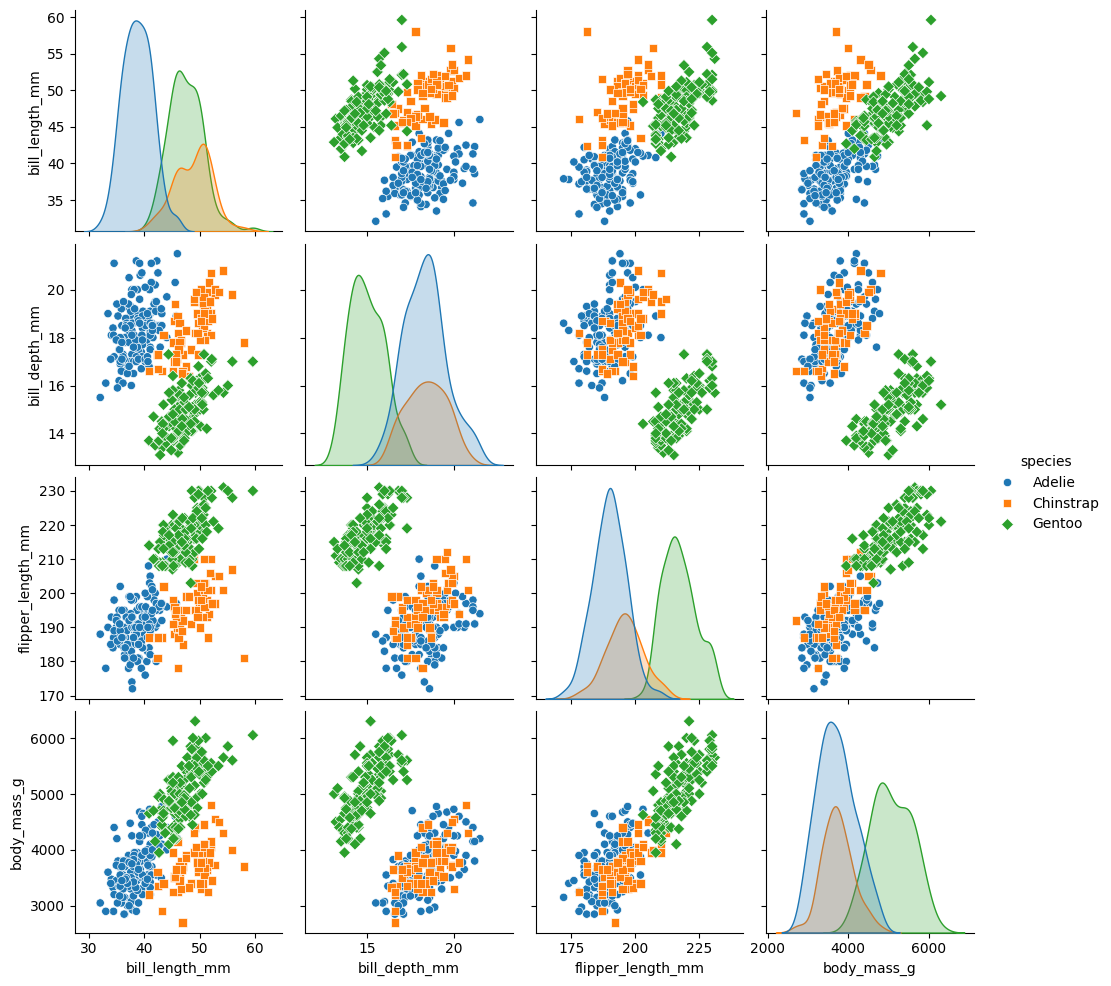

In [9]:
sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])

As with other figure-level functions, the size of the figure is controlled by setting the `height` of each individual subplot:

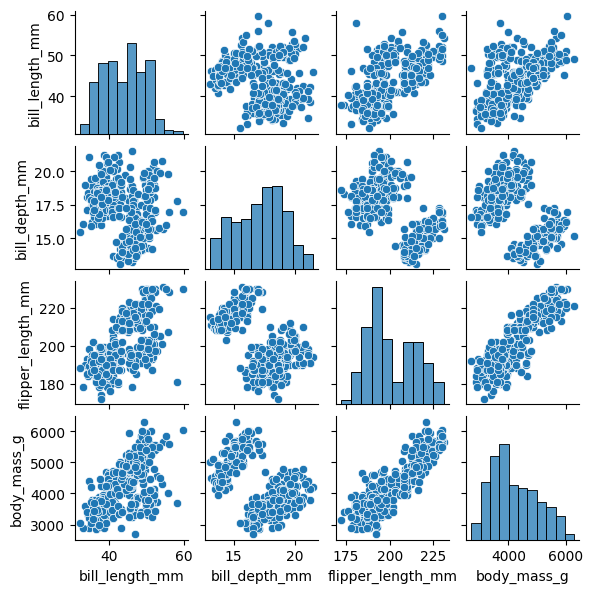

In [10]:
sns.pairplot(penguins, height=1.5)

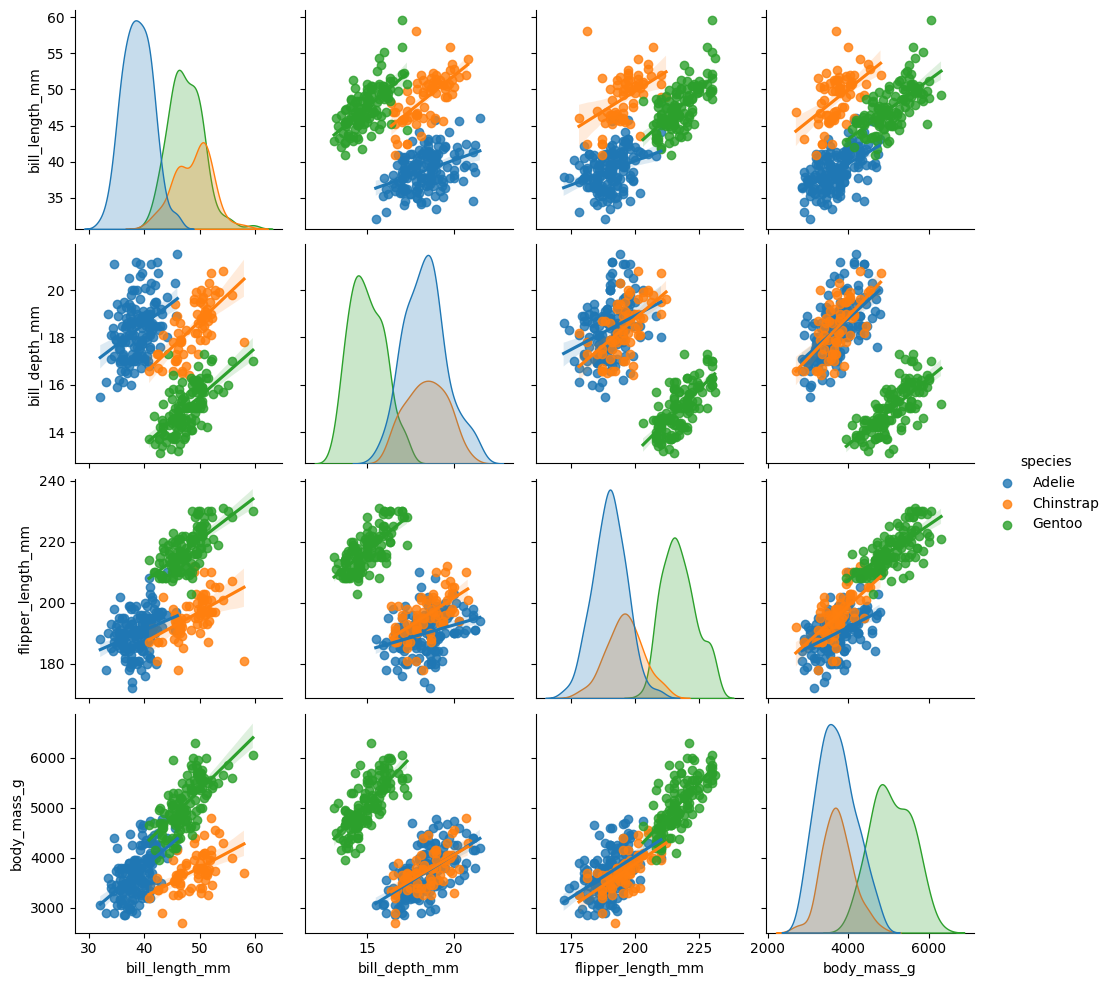

In [11]:
sns.pairplot(penguins,  kind='reg', hue='species')

Use `vars` or `x_vars` and `y_vars` to select the variables to plot:

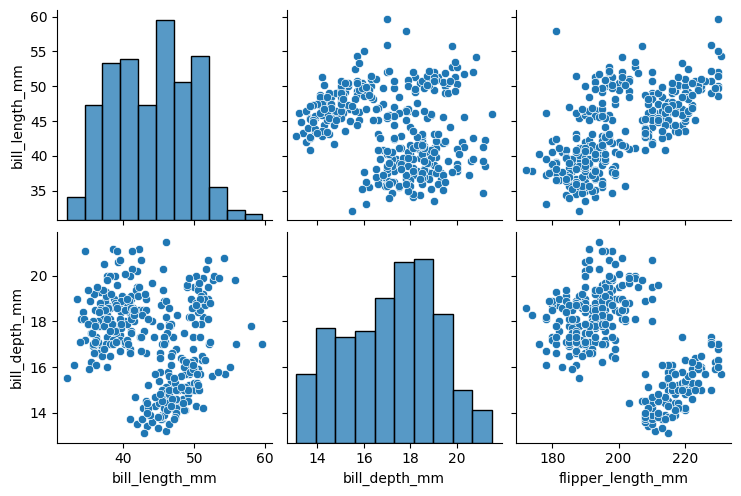

In [12]:
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
)

Set `corner=True` to plot only the lower triangle:

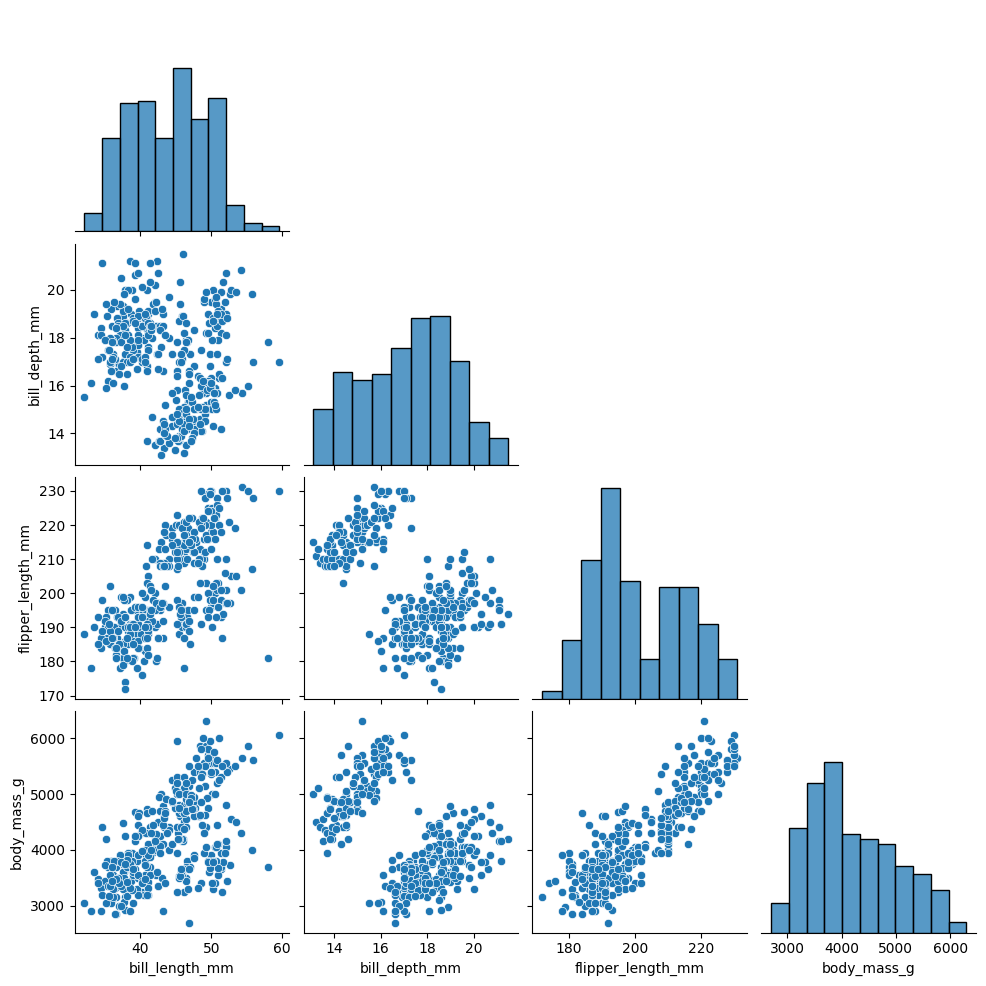

In [13]:
sns.pairplot(penguins, corner=True)

The `plot_kws` and `diag_kws` parameters accept dicts of keyword arguments to customize the off-diagonal and diagonal plots, respectively:

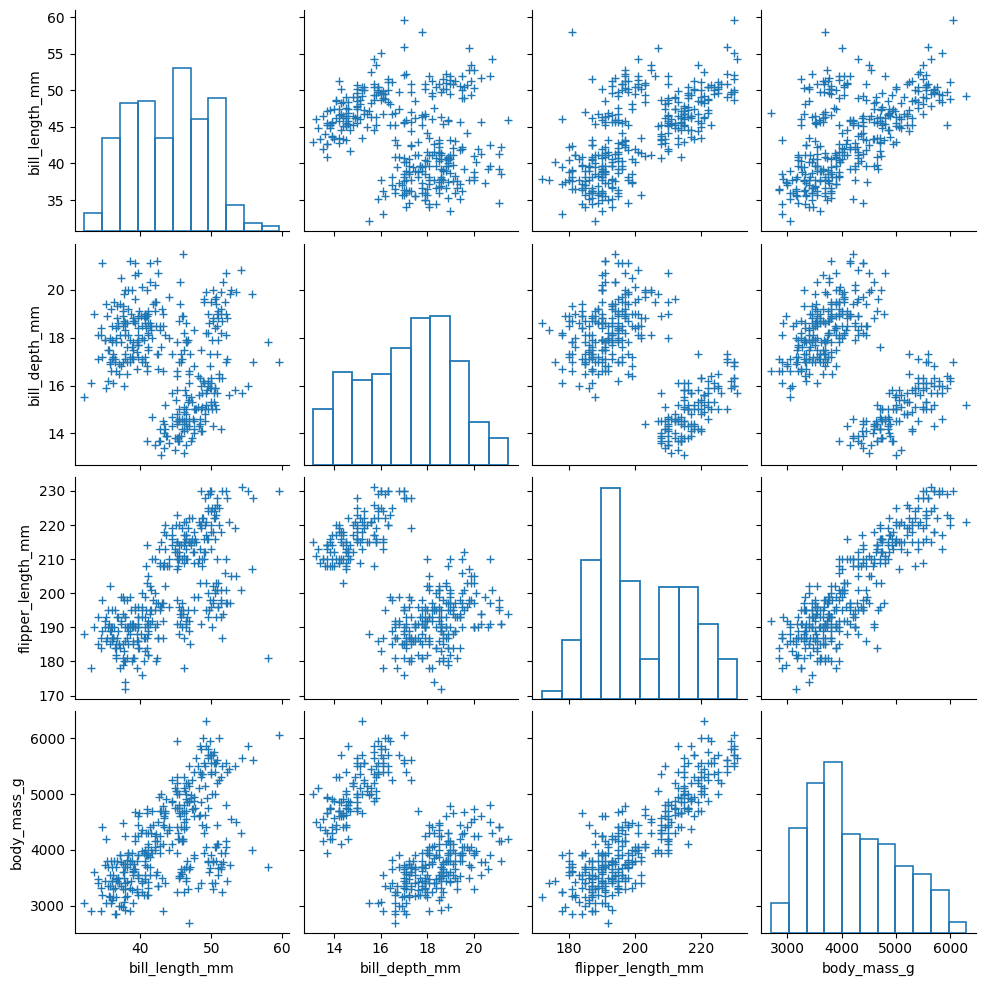

In [14]:
sns.pairplot(
    penguins,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

The return object is the underlying [`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid"), which can be used to further customize the plot:

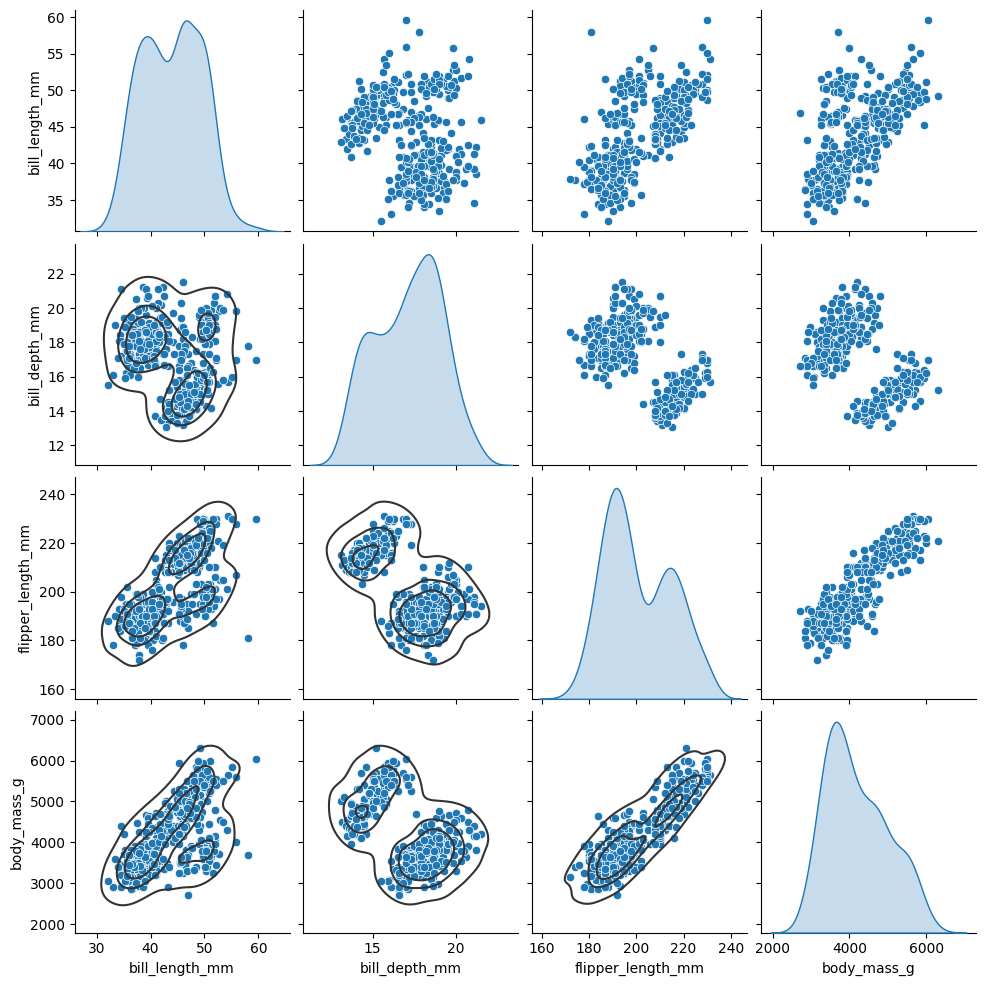

In [15]:
g = sns.pairplot(penguins, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

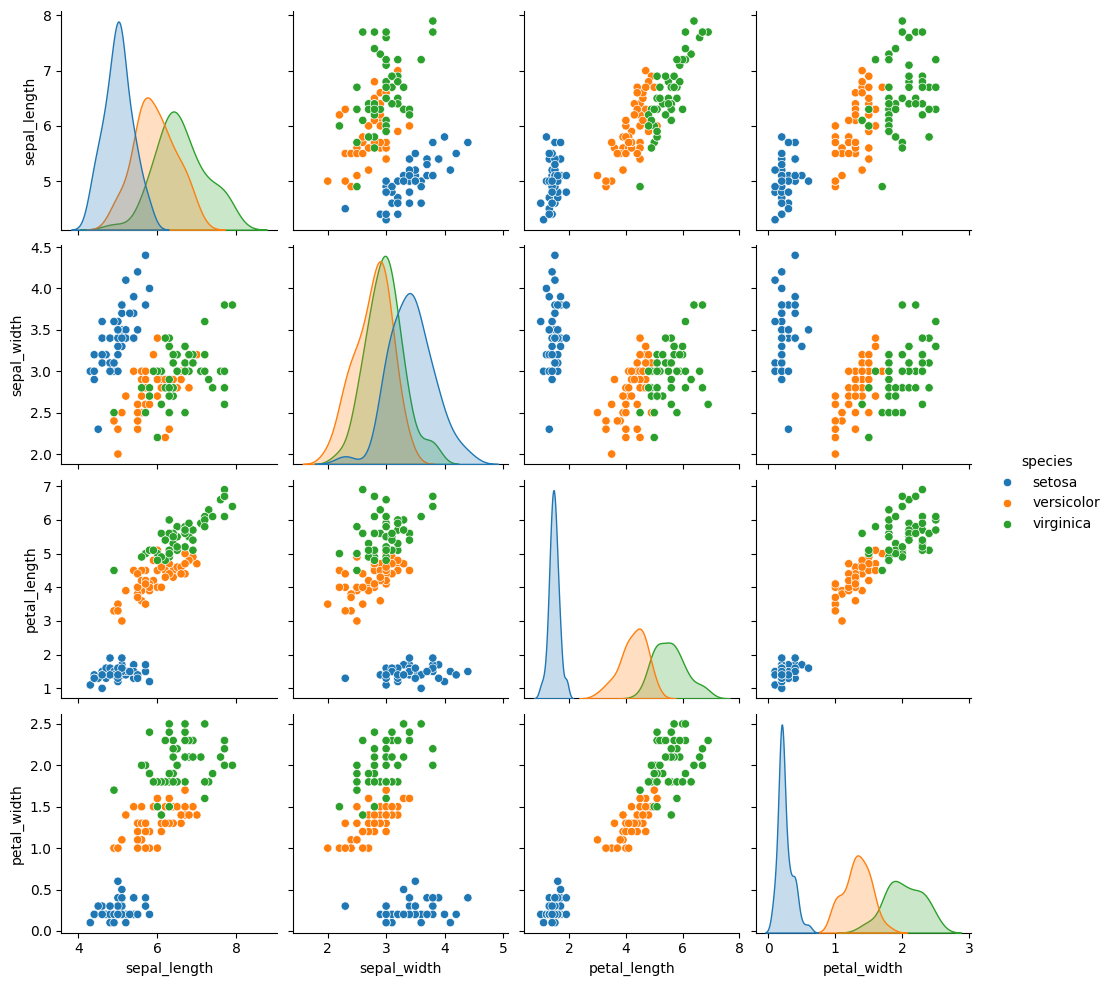

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Create a pair plot
sns.pairplot(iris, hue='species')

# Show the plot
plt.show()


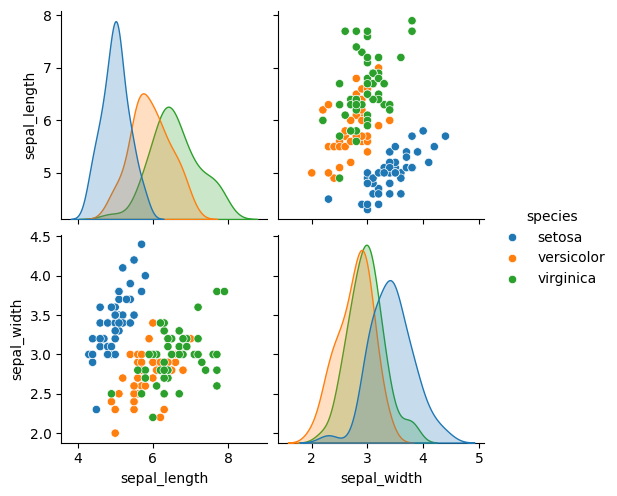

In [17]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width'], hue='species')


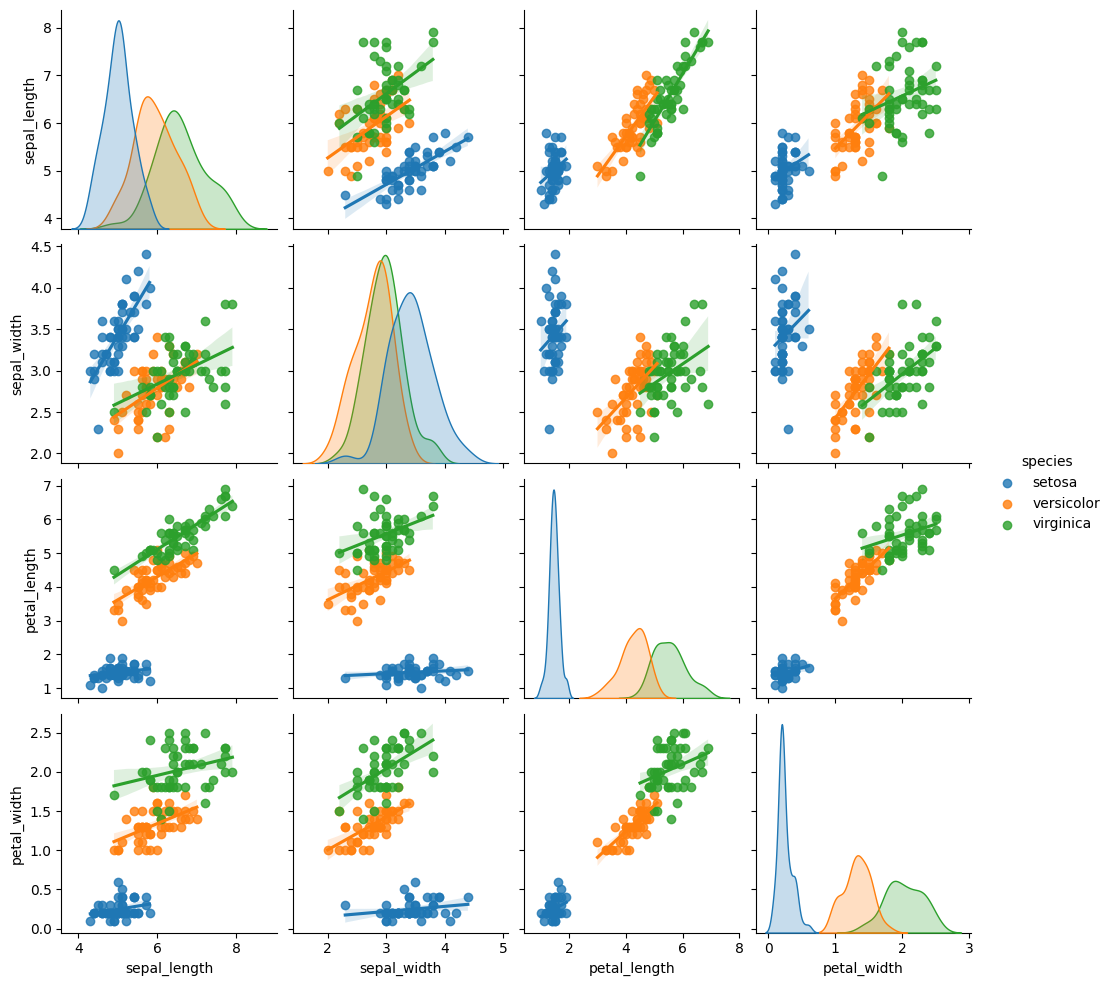

In [18]:
sns.pairplot(iris, hue='species', kind='reg')  # Adds regression lines


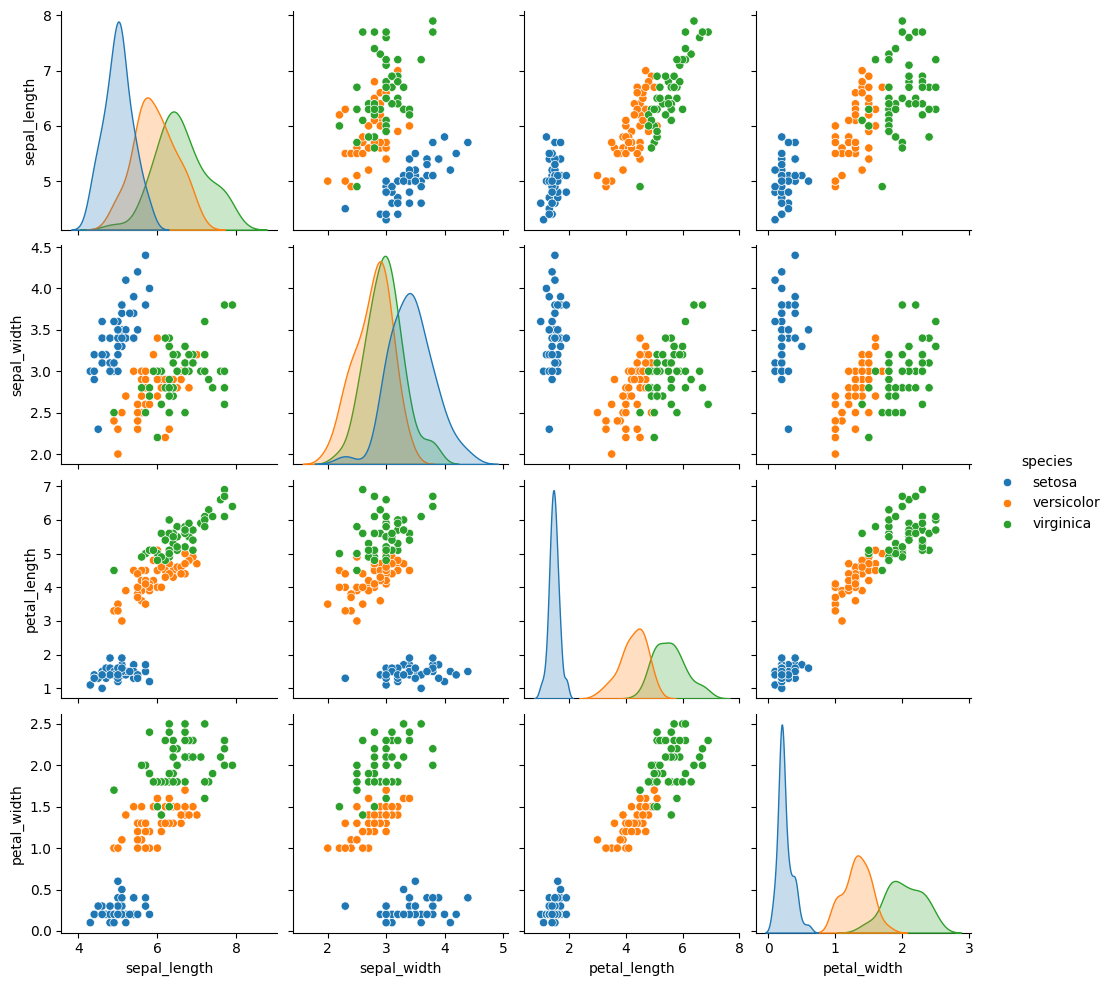

In [19]:
sns.pairplot(iris, hue='species', height=2.5)  # Adjusts the size of the plots



#### **Advantages:**

-   **Convenience:** Provides an easy way to generate a matrix of plots with minimal code.
-   **Integrated Histograms:** Includes histograms on the diagonal to show distributions.

#### **Limitations:**

-   **Less Flexibility:** Limited customization options compared to `FacetGrid`.
-   **Performance:** Can become slow or cluttered with large datasets or many variables.

### **2. `FacetGrid`**

-   **Purpose:** `FacetGrid` is a more general-purpose tool for creating grids of subplots based on one or more categorical variables. It allows for extensive customization and is not limited to scatter plots or histograms.
-   **Usage:** Ideal for creating complex grids of plots with various types of plots and for facetting data by multiple categories.

#### **Key Features:**

-   **Custom Plot Types:** Can create any kind of plot (e.g., scatter plots, bar plots, histograms) using the `map` or `map_dataframe` methods.
-   **Multiple Facets:** Allows for facetting by multiple categorical variables using `row` and `col` parameters.
-   **Customizations:** Extensive customization options, including adding titles, adjusting sizes, and modifying axis labels.

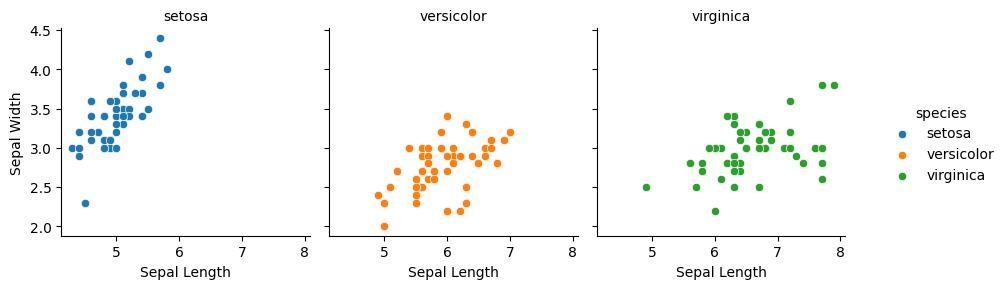

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Create a FacetGrid with scatter plots
g = sns.FacetGrid(iris, col='species', hue='species', margin_titles=True)
g.map(sns.scatterplot, 'sepal_length', 'sepal_width')

# Add legends, titles, and adjust labels
g.add_legend()
g.set_axis_labels('Sepal Length', 'Sepal Width')
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



#### **Advantages:**

-   **Flexibility:** Allows for creating various types of plots and customizing them extensively.
-   **Complex Facetting:** Can facet by multiple categories and customize each subplot.

#### **Limitations:**

-   **Complexity:** Requires more code and understanding of the API to set up compared to `pairplot`.
-   **Overhead:** May involve more overhead if only a simple pairwise plot is needed.

### **Summary**

-   **Use `pairplot`** when you need a quick and straightforward matrix of scatter plots and histograms to explore relationships between numerical variables.
-   **Use `FacetGrid`** when you need more flexibility and customization, or when creating grids of plots based on categorical variables with various plot types.

Both tools are excellent for data visualization, and the choice between them depends on the specific requirements of your analysis and visualization needs.